problem :

A speedy and accurate diagnosis of COVID-19 is made possible by effective SARS-CoV-2 screening, which can also lessen the burden on healthcare systems. There have been built prediction models that assess the likelihood of infection by combining a number of parameters. These are meant to help medical professionals all over the world treat patients, especially in light of the scarcity of healthcare resources. The current dataset has been downloaded from ‘ABC’ government website and contains around 2,78,848 individuals who have gone through the RT-PCR test. Data set contains 11 columns, including 8 features suspected to play an important role in the prediction of COVID19 outcome. Outcome variable is covid result test positive or negative. We have data from 11th March 2020 till 30th April 2020. Please consider 11th March till 15th April as a training and validation set. From 16th April till 30th April as a test set. Please further divide training and validation set at a ratio of 4:1.

### 1. Summary of the data

- The dataset under consideration is sourced from the 'ABC' government website and encompasses a comprehensive collection of information pertaining to individuals who have undergone RT-PCR testing for COVID-19.
- This dataset plays a pivotal role in the development of prediction models designed to assess the likelihood of COVID-19 infection, ultimately aiding healthcare professionals in effective patient management. The dataset spans from March 11, 2020, to April 30, 2020, capturing crucial data during the initial phases of the global pandemic.



### 2. Column Description

- `Ind_ID` : the unique identifier for each individual who have been gone through RT-PCR test.
- `Test_date` : Date of the individual's Covid test (11/3/2020 To 30/4/2020)
- `Cough_symptoms` : The corresponding symptom of covid disease for each individual (True/False)
- `Fever` : The corresponding symptom of covid disease for each individual (True/False)
- `Sore_throat` : The corresponding symptom of covid disease for each individual (True/False)
- `Shortness_of_breath` : The corresponding symptom of covid disease for each individual (True/False)
- `Headache` : The corresponding symptom of covid disease for each individual (True/False)
- `Corona` : The Result of Covid Test (Positive/Nagative)
- `Age_60_above` : Give the information about the people whose age above 60 years (Yes/No)   
- `Sex` : the assigned sex of each individual (Male/Female)
- `Known_contact` : Known contact with an individual confirmed to have COVID-19 (Other/Abroad/Contact with confirmed)




### Data Issue

- Missing Values in columns
- Incorrect data type assigned to Test_date, Cough_symptoms, Fever, Sore_throat, Shortness_of_breath, Headache, Corona, Age_60_above, Sex, Known_contact.
- Data is not same case(TRUE/True) in column : Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache.
- Corona column has three values (Positive,Negative,Other)
- Age_60_above has three values (Yes/No/Other)         
- Sex   (Male/Female/None)
- Known_contact (Other/Abroad/Contact with confirmed)        


# Section 1

1) why is your proposal is important in today's world?  How predicting a diesese accurately improve medical treatment

 In present era, various disease comes for example - covid. So, if we have data similar disease so we can do early treatment, helpful in drug development etc.   

2) How is it going impact medical field when it comes to effective screening and reducing health care burden

The effective screening and prediction of diseases can have a substantial impact on the medical field, leading to improved patient outcomes and reduced healthcare burden.
Here are some ways in which advancements in predictive screening can influence the medical field ;

- Early Detection and Prevention
- Resource Optimization
- Cost Reduction
- Improved Public Health Planning
- Enhanced Treatment Strategies etc.

3) if any, what is the gap in the knowledge or how y our proposed method can be helpful in the future if any other disease?

While predictive screening methods hold great promise for improving healthcare, there are still some challenges and gaps in knowledge that need to be addressed.
Here are a few considerations:

- Data Quality and Bias
- Interactions and Complexity
- Ethical and Privacy Concerns
- Integration into Healthcare Systems
- Multi-modal Integration etc.

In summary, while predictive screening methods show great potential, addressing these gaps and challenges will be crucial for their successful and ethical implementation. Continued research, interdisciplinary collaboration,
and ongoing efforts to improve data quality and model robustness will contribute to the development of effective and responsible predictive screening methods for various diseases in the future.

# Section 3

1) what approach are you going to take in order to prove or disprove your hypothesis

Null Hypothesis : Dacision Tree will be performance better  
Alter Hypothesis : Reject the null hypothesis

2) what Feature engineering techniques relavent in project ?

Feture selection , feature scaling techniues will going to use in this project.

3) which data analysis approach we used in project ?

Univariate Analysis , Bivariate Analysis

4) Indentify the patterns from EDA approach from findings.

Mention insight in Univariate and bivariate anlysis with graphs.

# Section 4

1) What Method will use for ML in prediction od covid19?

There are two methods : Classification and Regression
in this project we used is classification.

2) Justify most appropriate models

For the classification problem we are going to use:
- logistic regression
- Decision Tree
- Random forest Classifier
- XGboost

Random forest classifier best performing model for the data with accuracy for imbalaced data.

3) Please perform necessory steps to improve accuracy model

we do cross validation and hyper parameter tunig for improve the perfomance of model.

4) please perfrom atleast 4 models

For the classification problem we are going to use:
- logistic regression
- Decision Tree
- Random forest Classifier
- XGboost

In [ ]:
import numpy as np   #
import pandas as pd  #
import seaborn as sns #
import matplotlib.pyplot as plt #

In [ ]:
df = pd.read_csv('/content/corona_tested_006.csv')

In [12]:
df.shape   # No of rows and columns

(278848, 11)

In [ ]:
df.info()      # Checking the data type and null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Ind_ID               278848 non-null  int64 
 1   Test_date            278848 non-null  object
 2   Cough_symptoms       278848 non-null  object
 3   Fever                278848 non-null  object
 4   Sore_throat          278848 non-null  object
 5   Shortness_of_breath  278848 non-null  object
 6   Headache             278848 non-null  object
 7   Corona               278848 non-null  object
 8   Age_60_above         278848 non-null  object
 9   Sex                  278848 non-null  object
 10  Known_contact        278848 non-null  object
dtypes: int64(1), object(10)
memory usage: 23.4+ MB


In [ ]:
df.duplicated().sum()        # no duplicates values in data

0

In [13]:
df_copy = df.copy()


In [14]:
df_copy['Cough_symptoms'].value_counts()

False    127531
FALSE    108837
TRUE      21983
True      20245
None        252
Name: Cough_symptoms, dtype: int64

In [15]:
d = {'False':'No', 'FALSE':'No', 'TRUE':'Yes', 'True':'Yes'}

In [16]:
# Replade the value TRUE/FALSE/True/False

df_copy['Cough_symptoms']      = df_copy['Cough_symptoms'].map(d)
df_copy['Fever']               = df_copy['Fever'].map(d)
df_copy['Sore_throat']         = df_copy['Sore_throat'].map(d)
df_copy['Shortness_of_breath'] = df_copy['Shortness_of_breath'].map(d)
df_copy['Headache']            = df_copy['Headache'].map(d)

In [17]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Ind_ID               278848 non-null  int64 
 1   Test_date            278848 non-null  object
 2   Cough_symptoms       130820 non-null  object
 3   Fever                130820 non-null  object
 4   Sore_throat          65535 non-null   object
 5   Shortness_of_breath  65535 non-null   object
 6   Headache             65535 non-null   object
 7   Corona               278848 non-null  object
 8   Age_60_above         278848 non-null  object
 9   Sex                  278848 non-null  object
 10  Known_contact        278848 non-null  object
dtypes: int64(1), object(10)
memory usage: 23.4+ MB


In [ ]:
df_copy['Test_date']           = df_copy['Test_date'].astype('datetime64')
df_copy['Cough_symptoms']      = df_copy['Cough_symptoms'].astype('category')
df_copy['Fever']               = df_copy['Fever'].astype('category')
df_copy['Sore_throat']         = df_copy['Sore_throat'].astype('category')
df_copy['Shortness_of_breath'] = df_copy['Shortness_of_breath'].astype('category')
df_copy['Headache']            = df_copy['Headache'].astype('category')
df_copy['Corona']              = df_copy['Corona'].astype('category')
df_copy['Age_60_above']        = df_copy['Age_60_above'].astype('category')
df_copy['Sex']                 = df_copy['Sex'].astype('category')
df_copy['Known_contact']       = df_copy['Known_contact'].astype('category')


In [19]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Ind_ID               278848 non-null  int64         
 1   Test_date            278848 non-null  datetime64[ns]
 2   Cough_symptoms       130820 non-null  category      
 3   Fever                130820 non-null  category      
 4   Sore_throat          65535 non-null   category      
 5   Shortness_of_breath  65535 non-null   category      
 6   Headache             65535 non-null   category      
 7   Corona               278848 non-null  category      
 8   Age_60_above         278848 non-null  category      
 9   Sex                  278848 non-null  category      
 10  Known_contact        278848 non-null  category      
dtypes: category(9), datetime64[ns](1), int64(1)
memory usage: 6.6 MB


In [20]:
df_copy['Cough_symptoms']      = df_copy['Cough_symptoms'].fillna(df_copy['Cough_symptoms'].mode()[0])
df_copy['Fever']               = df_copy['Fever'].fillna(df_copy['Fever'].mode()[0])
df_copy['Sore_throat']         = df_copy['Sore_throat'].fillna(df_copy['Sore_throat'].mode()[0])
df_copy['Shortness_of_breath'] = df_copy['Shortness_of_breath'].fillna(df_copy['Shortness_of_breath'].mode()[0])
df_copy['Headache']            = df_copy['Headache'].fillna(df_copy['Headache'].mode()[0])

In [21]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Ind_ID               278848 non-null  int64         
 1   Test_date            278848 non-null  datetime64[ns]
 2   Cough_symptoms       278848 non-null  category      
 3   Fever                278848 non-null  category      
 4   Sore_throat          278848 non-null  category      
 5   Shortness_of_breath  278848 non-null  category      
 6   Headache             278848 non-null  category      
 7   Corona               278848 non-null  category      
 8   Age_60_above         278848 non-null  category      
 9   Sex                  278848 non-null  category      
 10  Known_contact        278848 non-null  category      
dtypes: category(9), datetime64[ns](1), int64(1)
memory usage: 6.6 MB


In [22]:
# Replace Values
df_copy['Sex'] = df_copy['Sex'].str.replace('None','female')
df_copy['Corona'] = df_copy['Corona'].str.replace('other','negative')
df_copy['Age_60_above'] = df_copy['Age_60_above'].str.replace('None','No')

In [23]:
df_copy['Sex'].value_counts()

female    149721
male      129127
Name: Sex, dtype: int64

In [24]:
df_copy['Corona'].value_counts()

negative    264119
positive     14729
Name: Corona, dtype: int64

In [25]:
df_copy['Age_60_above'].value_counts()

No     253023
Yes     25825
Name: Age_60_above, dtype: int64

In [27]:
df_copy.head()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,2020-11-03,Yes,No,Yes,No,No,negative,No,female,Abroad
1,2,2020-11-03,No,Yes,No,No,No,positive,No,female,Abroad
2,3,2020-11-03,No,Yes,No,No,No,positive,No,female,Abroad
3,4,2020-11-03,Yes,No,No,No,No,negative,No,female,Abroad
4,5,2020-11-03,Yes,No,No,No,No,negative,No,female,Contact with confirmed


 Column Type :

- `Numerical` : Ind_ID   
- `Category` : Test_date,	Cough_symptoms,	Fever, Sore_throat ,Shortness_of_breath,	Headache, Corona,	Age_60_above,	Sex,	Known_contact

<Axes: ylabel='Sex'>

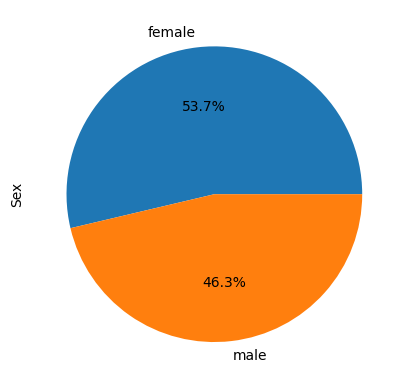

In [29]:
# Univariate analysis

# Column : 'Sex'

df_copy['Sex'].value_counts().plot(kind='pie',autopct='%0.1f%%')

# Insight :

# There were more female members than male in RT-PCR test

<Axes: >

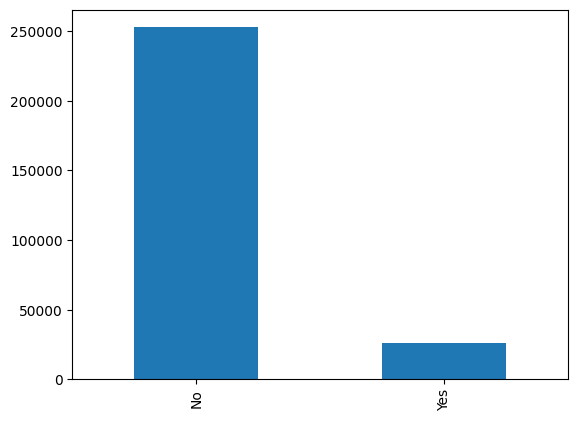

In [32]:
# column : 'Age_60_above'

df_copy['Age_60_above'].value_counts().plot(kind='bar')

# Insight : less people whose age were above 60 years.

In [35]:
# Bivariate analysis

#Column : Sex and Corona

pd.crosstab(df_copy['Sex'],df_copy['Corona'],normalize='columns')*100

# Insight : There were more male members are infected than female

Corona,negative,positive
Sex,,
female,53.957118,48.951049
male,46.042882,51.048951


In [36]:
#Column : Sex and Corona

pd.crosstab(df_copy['Age_60_above'],df_copy['Corona'],normalize='columns')*100

# Insight : majority were infected people were below 60 years.

Corona,negative,positive
Age_60_above,,
No,91.056683,85.036323
Yes,8.943317,14.963677


In [41]:
# column : Corona and Cough_symptoms

pd.crosstab(df_copy['Cough_symptoms'],df_copy['Corona'],normalize='columns')*100

Corona,negative,positive
Cough_symptoms,,
No,93.574866,65.965103
Yes,6.425134,34.034897


In [44]:
# column : Corona and Fever

pd.crosstab(df_copy['Fever'],df_copy['Corona'],normalize='columns')*100

Corona,negative,positive
Fever,,
No,97.284936,68.911671
Yes,2.715064,31.088329


In [45]:
# column : Corona and Sore_throat

pd.crosstab(df_copy['Sore_throat'],df_copy['Corona'],normalize='columns')*100

Corona,negative,positive
Sore_throat,,
No,99.878842,94.038971
Yes,0.121158,5.961029


In [47]:
# column : Corona and Headache

pd.crosstab(df_copy['Headache'],df_copy['Corona'],normalize='columns')*100

Corona,negative,positive
Headache,,
No,99.954566,91.11956
Yes,0.045434,8.88044


In [48]:
# column : Corona and Shortness_of_breath

pd.crosstab(df_copy['Shortness_of_breath'],df_copy['Corona'],normalize='columns')*100

Corona,negative,positive
Shortness_of_breath,,
No,99.862562,94.948741
Yes,0.137438,5.051259


Conclusion :
- As per above analysis, there are more male members are infected with covid disease.
- Fever and Cough_symptoms are most common symptoms of infected people than other symptoms.
the other.
- Majorly below 60 years old people is tested for RT-PCR test.
- The number of people who had gone through Covid test report as negitve is higher than the number of people who got Covid test report as positve.


In [49]:
df_copy.head()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,2020-11-03,Yes,No,Yes,No,No,negative,No,female,Abroad
1,2,2020-11-03,No,Yes,No,No,No,positive,No,female,Abroad
2,3,2020-11-03,No,Yes,No,No,No,positive,No,female,Abroad
3,4,2020-11-03,Yes,No,No,No,No,negative,No,female,Abroad
4,5,2020-11-03,Yes,No,No,No,No,negative,No,female,Contact with confirmed


In [51]:
# Target variable column : Corona
# Nomonal columns : Cough_symptoms,	Fever, Sore_throat,	Shortness_of_breath,	Headache, Age_60_above,	Sex,	Known_contact

In [64]:
test = df_copy.copy()

test = pd.get_dummies(test,columns=['Cough_symptoms','Fever','Sore_throat','Shortness_of_breath','Headache','Age_60_above','Sex','Known_contact'],drop_first=True)


In [65]:
test.drop(columns=['Ind_ID','Test_date'],axis=1,inplace=True)

In [66]:
test

,Corona,Cough_symptoms_Yes,Fever_Yes,Sore_throat_Yes,Shortness_of_breath_Yes,Headache_Yes,Age_60_above_Yes,Sex_male,Known_contact_Contact with confirmed,Known_contact_Other
0,negative,1,0,1,0,0,0,0,0,0
1,positive,0,1,0,0,0,0,0,0,0
2,positive,0,1,0,0,0,0,0,0,0
3,negative,1,0,0,0,0,0,0,0,0
4,negative,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
278843,positive,0,0,0,0,0,0,1,0,1
278844,negative,0,0,0,0,0,0,0,0,1
278845,negative,0,0,0,0,0,0,1,0,1
278846,negative,0,0,0,0,0,0,1,0,1


In [69]:
# to encode a target variable using map

test['Corona'].value_counts()

negative    264119
positive     14729
Name: Corona, dtype: int64

In [75]:
k={'negative': 0 ,'positive': 1 }

test['Corona']=test['Corona'].map(k)

In [76]:
test.head()

,Corona,Cough_symptoms_Yes,Fever_Yes,Sore_throat_Yes,Shortness_of_breath_Yes,Headache_Yes,Age_60_above_Yes,Sex_male,Known_contact_Contact with confirmed,Known_contact_Other
0,0,1,0,1,0,0,0,0,0,0
1,1,0,1,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,1,0


# Logistic Regression :

In [77]:
x=test.drop(columns='Corona',axis=1)
y=test['Corona']

In [156]:
x.columns

Index(['Cough_symptoms_Yes', 'Fever_Yes', 'Sore_throat_Yes',
       'Shortness_of_breath_Yes', 'Headache_Yes', 'Age_60_above_Yes',
       'Sex_male', 'Known_contact_Contact with confirmed',
       'Known_contact_Other'],
      dtype='object')

In [80]:
# divide the data into train and test values, 80% 20%

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

In [81]:
x_train

,Cough_symptoms_Yes,Fever_Yes,Sore_throat_Yes,Shortness_of_breath_Yes,Headache_Yes,Age_60_above_Yes,Sex_male,Known_contact_Contact with confirmed,Known_contact_Other
72894,0,0,0,0,0,1,1,0,1
109499,0,0,0,0,0,0,0,0,1
95257,0,0,0,0,0,0,0,0,1
83336,0,0,0,0,0,0,0,0,1
82973,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...
211543,0,0,0,0,0,0,0,0,1
86293,0,0,0,0,0,0,1,0,1
122579,0,0,0,0,0,0,1,0,1
152315,0,0,0,0,0,0,0,0,1


In [82]:
y_train

72894     0
109499    1
95257     0
83336     0
82973     0
         ..
211543    0
86293     0
122579    1
152315    0
117952    0
Name: Corona, Length: 223078, dtype: int64

In [83]:
x_test

,Cough_symptoms_Yes,Fever_Yes,Sore_throat_Yes,Shortness_of_breath_Yes,Headache_Yes,Age_60_above_Yes,Sex_male,Known_contact_Contact with confirmed,Known_contact_Other
229115,0,0,0,0,0,0,1,0,0
181871,0,0,0,0,0,0,1,0,1
219603,0,0,0,0,0,0,1,0,1
138213,0,0,0,0,0,0,1,0,1
207510,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
146562,0,0,0,0,0,0,1,0,1
134440,0,0,0,0,0,0,1,0,1
177691,0,0,0,0,0,0,0,0,1
225194,0,0,0,0,0,0,1,0,1


In [84]:
y_test

229115    0
181871    0
219603    0
138213    0
207510    0
         ..
146562    0
134440    0
177691    0
225194    0
259430    0
Name: Corona, Length: 55770, dtype: int64

In [85]:
# model training
from sklearn.linear_model import LogisticRegression
log_r=LogisticRegression()
log_r.fit(x_train,y_train)

LogisticRegression()

In [86]:
# evaluate the trained model

y_pred=log_r.predict(x_test)

In [87]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [88]:
# metrics- confusion matrix, precision recall, accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score,recall_score, f1_score
print(confusion_matrix(y_test,y_pred))


[[52115   682]
 [ 1362  1611]]


In [89]:
test['Corona'].value_counts() #imbalanced data

0    264119
1     14729
Name: Corona, dtype: int64

In [90]:
print(accuracy_score(y_test,y_pred))

0.9633494710417787


In [91]:
print(precision_score(y_test,y_pred))

0.7025730484081989


In [92]:
print(recall_score(y_test,y_pred))

0.5418768920282543


# Decision Tree

In [93]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [94]:
# evaluate the model
y_pred1=dt.predict(x_test)

In [95]:
y_pred1

array([0, 0, 0, ..., 0, 0, 0])

In [97]:
from sklearn.metrics import f1_score
print(accuracy_score(y_test,y_pred1))
print(precision_score(y_test,y_pred1))
print(recall_score(y_test,y_pred1))
print(f1_score(y_test,y_pred1))

0.9644970414201184
0.7395079594790159
0.515640766902119
0.6076099881093935


# Random Forest Classifier

In [98]:
# model training
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [100]:
# Evaluate the model
y_pred2=rf.predict(x_test)

In [101]:
# confusion matrix
from sklearn import metrics
print(metrics.confusion_matrix(y_test,y_pred2))

[[52256   541]
 [ 1437  1536]]


In [103]:
print(accuracy_score(y_test,y_pred2))
print(precision_score(y_test,y_pred2))
print(recall_score(y_test,y_pred2))
print(f1_score(y_test,y_pred2))

0.9645329029944415
0.7395281656234954
0.5166498486377397
0.6083168316831683


# Xgboost :

In [104]:
# Xgboost,
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [105]:
# prediction
y_pred3=xgb.predict(x_test)

In [108]:
# confusion matrix
from sklearn import metrics
print(metrics.confusion_matrix(y_test,y_pred3))

[[52249   548]
 [ 1428  1545]]


In [109]:
print(metrics.accuracy_score(y_test,y_pred3))
print(precision_score(y_test,y_pred3))
print(recall_score(y_test,y_pred3))
print(f1_score(y_test,y_pred3))

0.9645687645687646
0.7381748686096512
0.5196770938446014
0.6099486774575601


Conclusion :
- Among the all the ML models Random forest Classifier is best suitable for the data.

#  SQL Queries

In [110]:
import duckdb
conn=duckdb.connect()


In [119]:
conn.register('df_copy',df_copy)

In [123]:
conn.execute("select * from df_copy").fetchall()

[(1,
  datetime.datetime(2020, 11, 3, 0, 0),
  'Yes',
  'No',
  'Yes',
  'No',
  'No',
  'negative',
  'No',
  'female',
  'Abroad'),
 (2,
  datetime.datetime(2020, 11, 3, 0, 0),
  'No',
  'Yes',
  'No',
  'No',
  'No',
  'positive',
  'No',
  'female',
  'Abroad'),
 (3,
  datetime.datetime(2020, 11, 3, 0, 0),
  'No',
  'Yes',
  'No',
  'No',
  'No',
  'positive',
  'No',
  'female',
  'Abroad'),
 (4,
  datetime.datetime(2020, 11, 3, 0, 0),
  'Yes',
  'No',
  'No',
  'No',
  'No',
  'negative',
  'No',
  'female',
  'Abroad'),
 (5,
  datetime.datetime(2020, 11, 3, 0, 0),
  'Yes',
  'No',
  'No',
  'No',
  'No',
  'negative',
  'No',
  'female',
  'Contact with confirmed'),
 (6,
  datetime.datetime(2020, 11, 3, 0, 0),
  'Yes',
  'No',
  'No',
  'No',
  'No',
  'negative',
  'No',
  'female',
  'Contact with confirmed'),
 (7,
  datetime.datetime(2020, 11, 3, 0, 0),
  'No',
  'No',
  'No',
  'No',
  'No',
  'negative',
  'No',
  'female',
  'Other'),
 (8,
  datetime.datetime(2020, 11, 3, 

Q.1) Find the number of corona patients who faced shortness of breath

In [136]:
conn.execute("SELECT COUNT(*) FROM df_copy WHERE Shortness_of_breath = 'Yes' AND Corona= 'positive'").fetchall()

[(744,)]

Q.2) Find the number of negative corona patients who have fever and sore throat

In [138]:
conn.execute("SELECT COUNT(*) FROM df_copy WHERE Fever = 'Yes' AND Sore_throat = 'Yes' AND Corona= 'positive'").fetchall()

[(457,)]

Q.3)  

In [143]:
conn.execute("SELECT MONTH(Test_date) AS Month, COUNT(*) AS No_of_positive_cases FROM df_copy WHERE Corona = 'positive' GROUP BY MONTH(Test_date) ORDER BY COUNT(*) DESC").fetchall()

[(3, 6283),
 (4, 4188),
 (1, 682),
 (2, 615),
 (5, 505),
 (7, 483),
 (6, 394),
 (10, 356),
 (11, 331),
 (12, 330),
 (9, 288),
 (8, 274)]

Q.4) Find the female negative corona patients who faced cough and headache

In [146]:
conn.execute("SELECT COUNT(*) FROM df_copy WHERE Sex = 'female' AND Cough_symptoms = 'Yes' AND Headache = 'Yes' AND Corona = 'negative'").fetchall()

[(49,)]

Q.5) How many elderly corona patients have faced breathing problems?

In [149]:
conn.execute("SELECT COUNT(*) FROM df_copy WHERE Age_60_above = 'Yes' AND Shortness_of_breath = 'Yes' AND Corona= 'positive'").fetchall()

[(169,)]

Q.6) Which three symptoms were more common among COVID positive patients?

In [153]:
conn.execute("SELECT Cough_symptoms, Fever, Sore_throat, Shortness_of_breath, Headache, COUNT(*) as total_count FROM df_copy WHERE Corona = 'positive' GROUP BY Cough_symptoms, Fever, Sore_throat, Shortness_of_breath, Headache ORDER BY total_count DESC LIMIT 3").fetchall()

[('No', 'No', 'No', 'No', 'No', 7534),
 ('Yes', 'Yes', 'No', 'No', 'No', 1979),
 ('Yes', 'No', 'No', 'No', 'No', 1650)]

Q.7) Which symptom was less common among COVID negative people?

In [154]:
conn.execute("SELECT Cough_symptoms, Fever, Sore_throat, Shortness_of_breath, Headache, COUNT(*) as total_count FROM df_copy WHERE Corona = 'negative' GROUP BY Cough_symptoms, Fever, Sore_throat, Shortness_of_breath, Headache ORDER BY total_count LIMIT 3").fetchall()

[('No', 'Yes', 'Yes', 'Yes', 'Yes', 1),
 ('No', 'Yes', 'No', 'Yes', 'Yes', 2),
 ('No', 'No', 'No', 'Yes', 'Yes', 3)]

Q.8) What are the most common symptoms among COVID positive males whose known contact was abroad?

In [155]:
conn.execute("SELECT Cough_symptoms,Fever,Sore_throat,Shortness_of_breath, Headache FROM df_copy WHERE Corona= 'positive' AND Sex = 'male' AND Known_contact = 'Abroad' ORDER BY Cough_symptoms,Fever,Sore_throat,Shortness_of_breath, Headache DESC LIMIT 3").fetchall()

[('No', 'No', 'No', 'No', 'Yes'),
 ('No', 'No', 'No', 'No', 'Yes'),
 ('No', 'No', 'No', 'No', 'Yes')]